User Engagement Analysis is a data-driven approach to assess and understand user involvement, interaction, and satisfaction with a product, service, or platform. It involves analyzing various metrics and behavioural patterns to gain insights into user behaviour and preferences. It aids businesses in making informed decisions to enhance user experience, optimize marketing strategies, and improve overall product or service performance.

User Engagement Analysis: Overview
User Engagement Analysis helps businesses understand how people interact with their products or services, allowing them to make improvements that make users happier and more likely to stick around. It helps businesses create better UI/UX for their customers and ultimately achieve their goals.

User Engagement Analysis helps various types of businesses, including e-commerce, social media, mobile apps, and online platforms. For example, an e-commerce company can use it to understand how customers navigate their website, what products they like, and how long they stay on each page. It helps the company optimize their website design, personalize product recommendations, and improve marketing strategies to increase customer satisfaction and loyalty.

For User Engagement Analysis, businesses need data that captures how users interact with their product, service, or platform. It includes information like the number of times users visit a website or app, the actions they take (such as clicks or purchases), how long they stay on a page or within a session, or any feedback they provide. I found an ideal dataset for the task of User Engagement Analysis

In [1]:
import pandas as pd
import numpy as np

In [32]:
df=pd.read_csv('bounce-rate.csv')

In [10]:
df.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
0,5.778476e+08,367,00:01:35,87.19%
1,1.583822e+09,260,00:01:04,29.62%
2,1.030699e+09,237,00:00:02,99.16%
3,1.025030e+09,226,00:02:22,25.66%
4,1.469968e+09,216,00:01:23,46.76%


In [4]:
df.shape

(999, 4)

In [5]:
df.describe()

,Client ID,Sessions
count,9.990000e+02,999.000000
mean,1.036401e+09,32.259259
std,6.151503e+08,24.658588
min,1.849182e+05,17.000000
25%,4.801824e+08,21.000000
50%,1.029507e+09,25.000000
75%,1.587982e+09,35.000000
max,2.063338e+09,367.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    object 
 3   Bounce Rate            999 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [19]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

The Avg. Session Duration and Bounce Rate columns are not numerical. We need to convert them into appropriate data types for this task.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    object 
 3   Bounce Rate            999 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


In [33]:
df['Avg. Session Duration'] = df['Avg. Session Duration'].str[1:]
print(df)
df['Avg. Session Duration'] = pd.to_timedelta(df['Avg. Session Duration'])
print(df)
df['Avg. Session Duration'] = df['Avg. Session Duration'] / pd.Timedelta(minutes=1)
print(df)


        Client ID  Sessions Avg. Session Duration Bounce Rate
0    5.778476e+08       367               0:01:35      87.19%
1    1.583822e+09       260               0:01:04      29.62%
2    1.030699e+09       237               0:00:02      99.16%
3    1.025030e+09       226               0:02:22      25.66%
4    1.469968e+09       216               0:01:23      46.76%
..            ...       ...                   ...         ...
994  1.049263e+09        17               0:07:44      41.18%
995  1.145806e+09        17               0:05:37      47.06%
996  1.153811e+09        17               0:00:12      94.12%
997  1.182133e+09        17               0:01:13      88.24%
998  1.184187e+09        17               0:02:34      64.71%

[999 rows x 4 columns]
        Client ID  Sessions Avg. Session Duration Bounce Rate
0    5.778476e+08       367       0 days 00:01:35      87.19%
1    1.583822e+09       260       0 days 00:01:04      29.62%
2    1.030699e+09       237       0 days 00:00

In [34]:
df['Bounce Rate'] = df['Bounce Rate'].str.rstrip('%').astype('float')
print(df)

        Client ID  Sessions  Avg. Session Duration  Bounce Rate
0    5.778476e+08       367               1.583333        87.19
1    1.583822e+09       260               1.066667        29.62
2    1.030699e+09       237               0.033333        99.16
3    1.025030e+09       226               2.366667        25.66
4    1.469968e+09       216               1.383333        46.76
..            ...       ...                    ...          ...
994  1.049263e+09        17               7.733333        41.18
995  1.145806e+09        17               5.616667        47.06
996  1.153811e+09        17               0.200000        94.12
997  1.182133e+09        17               1.216667        88.24
998  1.184187e+09        17               2.566667        64.71

[999 rows x 4 columns]


In the above code, we removed the first character from each value in the “Avg. Session Duration” column, representing a unit of time. Then, we converted the values in the “Avg. Session Duration” column to a standardized time delta format, representing time durations. Then, we further converted the time delta values to minutes, providing the average session duration in a numeric format. Similarly, we removed the percentage sign from each value in the “Bounce Rate” column and converted them to float values, representing the bounce rate as decimals.

In [36]:
print(df.describe())

          Client ID    Sessions  Avg. Session Duration  Bounce Rate
count  9.990000e+02  999.000000             999.000000   999.000000
mean   1.036401e+09   32.259259               3.636520    65.307978
std    6.151503e+08   24.658588               4.040562    22.997270
min    1.849182e+05   17.000000               0.000000     4.880000
25%    4.801824e+08   21.000000               0.891667    47.370000
50%    1.029507e+09   25.000000               2.466667    66.670000
75%    1.587982e+09   35.000000               4.816667    85.190000
max    2.063338e+09  367.000000              30.666667   100.000000


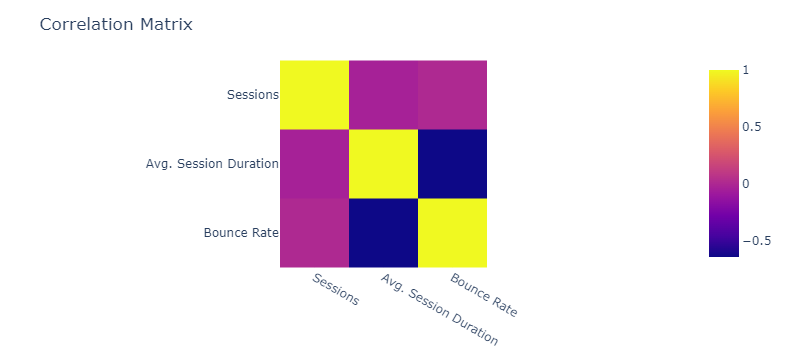

In [39]:
# Exclude 'Client Id' column from the dataset
data_without_id = df.drop('Client ID', axis=1)

# Calculate the correlation matrix
correlation_matrix = data_without_id.corr()

# Visualize the correlation matrix
correlation_fig = px.imshow(correlation_matrix, 
                            labels=dict(x='Features', 
                                        y='Features', 
                                        color='Correlation'))
correlation_fig.update_layout(title='Correlation Matrix')
correlation_fig.show()

Let’s analyze the bounce rate of users to understand user engagement. Bounce rate refers to the percentage of users who visit a website or webpage but leave without taking any further action or navigating to other pages within the same site. In simple terms, it measures the rate at which visitors bounce away from a website. 

It is a helpful metric in user engagement analysis because it provides insights into user behaviour and the effectiveness of a website or webpage in capturing and retaining user interest. A high bounce rate often indicates that users are not finding what they expected or desired on the site. It can suggest issues such as poor user experience, irrelevant content, slow page load times, or misleading marketing campaigns. 

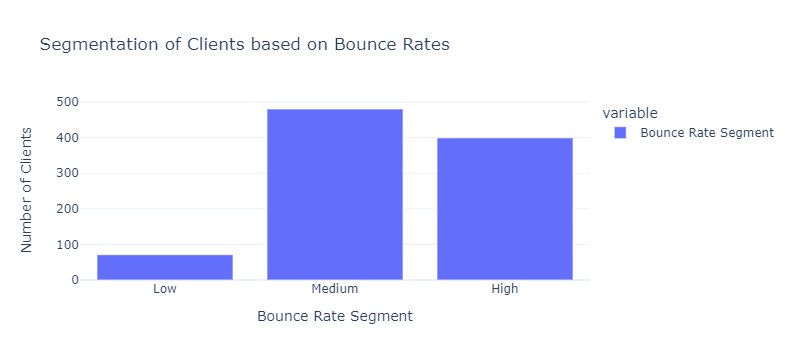

In [41]:
# Define the thresholds for high, medium, and low bounce rates
high_bounce_rate_threshold = 70
low_bounce_rate_threshold = 30

# Segment the clients based on bounce rates
df['Bounce Rate Segment'] = pd.cut(df['Bounce Rate'], 
                                     bins=[0, low_bounce_rate_threshold, 
                                           high_bounce_rate_threshold, 100],
                                   labels=['Low', 'Medium', 'High'], right=False)

# Count the number of clients in each segment
segment_counts = df['Bounce Rate Segment'].value_counts().sort_index()

# Visualize the segments
segment_fig = px.bar(segment_counts, labels={'index': 'Bounce Rate Segment', 
                                             'value': 'Number of Clients'},
                     title='Segmentation of Clients based on Bounce Rates')
segment_fig.show()

We created bounce rate segments and analyzed the number of users in each segment in the above code. Now let’s have a look at the average session duration of the users in each bounce rate segment:

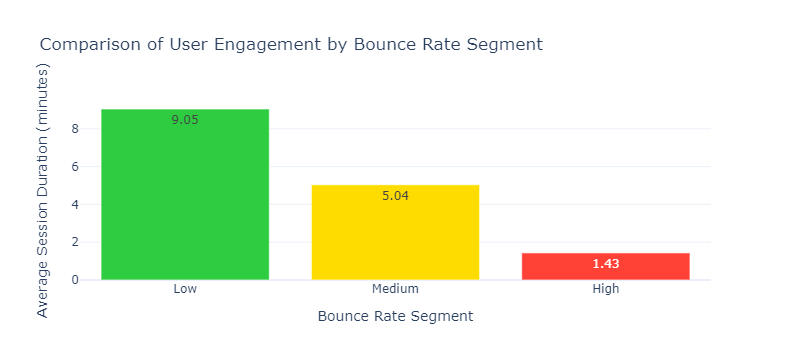

Bounce Rate Segment
Low       9.046479
Medium    5.038854
High      1.433417
Name: Avg. Session Duration, dtype: float64

In [45]:
# Calculate the average session duration for each segment
segment_avg_duration = df.groupby('Bounce Rate Segment')['Avg. Session Duration'].mean()

# Create a bar chart to compare user engagement
engagement_fig = go.Figure(data=go.Bar(
    x=segment_avg_duration.index,
    y=segment_avg_duration,
    text=segment_avg_duration.round(2),
    textposition='auto',
    marker=dict(color=['#2ECC40', '#FFDC00', '#FF4136'])
))

engagement_fig.update_layout(
    title='Comparison of User Engagement by Bounce Rate Segment',
    xaxis=dict(title='Bounce Rate Segment'),
    yaxis=dict(title='Average Session Duration (minutes)'),
)

engagement_fig.show()
segment_avg_duration

So we can see that users with low bounce rates have an average session duration of about 9.05 minutes on the website, while users with high bounce rates have an average session duration of only 1.43 minutes.

Now let’s have a look at the top 10 loyal users according to the number of sessions and average session duration:

In [46]:
# Calculate the total session duration for each client
df['Total Session Duration'] = df['Sessions'] * df['Avg. Session Duration']

# Sort the DataFrame by the total session duration in descending order
df_sorted = df.sort_values('Total Session Duration', ascending=False)

# the top 10 most loyal users
df_sorted.head(10)

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,Total Session Duration
20,1.884620e+09,93,30.666667,16.13,Low,2852.000000
54,1.041722e+09,67,20.500000,22.39,Low,1373.500000
262,8.756557e+08,34,29.966667,26.47,Low,1018.866667
10,1.461865e+09,117,8.450000,48.72,Medium,988.650000
173,1.849182e+05,40,24.416667,17.50,Low,976.666667
15,1.049234e+09,99,9.716667,34.34,Medium,961.950000
310,2.026953e+09,31,22.116667,35.48,Medium,685.616667
24,1.903206e+09,90,7.016667,36.67,Medium,631.500000
211,2.054569e+09,37,16.250000,35.14,Medium,601.250000
402,6.220935e+08,28,21.300000,39.29,Medium,596.400000


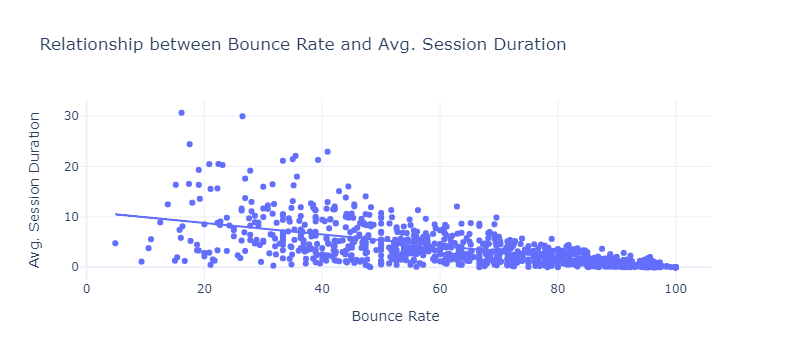

In [47]:
# Create a scatter plot to analyze the relationship between bounce rate and avg session duration
scatter_fig = px.scatter(df, x='Bounce Rate', y='Avg. Session Duration',
                         title='Relationship between Bounce Rate and Avg. Session Duration', trendline='ols')

scatter_fig.update_layout(
    xaxis=dict(title='Bounce Rate'),
    yaxis=dict(title='Avg. Session Duration')
)

scatter_fig.show()

So there is a negative linear relationship between the average session duration and bounce rates (which is ideal here). It means a high number of average session duration results in lower bounce rates.

Analyzing User Retention
Now let’s analyze user engagement by calculating the number of users the platform has retained so far. Retained users are those individuals who continue to use or engage with a product, service, or platform over a specific period of time. They are users who return and remain active or loyal to the offering after their initial interaction or sign-up.

Retained users demonstrate ongoing engagement, repeated usage, or continued interactions with the offering, indicating a level of satisfaction or value derived from the product or service. Businesses often focus on retaining users to drive growth, improve customer loyalty, and achieve sustainable success in the market

In [49]:
# Define the retention segments based on number of sessions
def get_retention_segment(row):
    if row['Sessions'] >= 32: # 32 is mean of sessions
        return 'Frequent Users'
    else:
        return 'Occasional Users'

# Create a new column for retention segments
df['Retention Segment'] = df.apply(get_retention_segment, axis=1)

# Print the updated DataFrame
df

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,Total Session Duration,Retention Segment
0,5.778476e+08,367,1.583333,87.19,High,581.083333,Frequent Users
1,1.583822e+09,260,1.066667,29.62,Low,277.333333,Frequent Users
2,1.030699e+09,237,0.033333,99.16,High,7.900000,Frequent Users
3,1.025030e+09,226,2.366667,25.66,Low,534.866667,Frequent Users
4,1.469968e+09,216,1.383333,46.76,Medium,298.800000,Frequent Users
...,...,...,...,...,...,...,...
994,1.049263e+09,17,7.733333,41.18,Medium,131.466667,Occasional Users
995,1.145806e+09,17,5.616667,47.06,Medium,95.483333,Occasional Users
996,1.153811e+09,17,0.200000,94.12,High,3.400000,Occasional Users
997,1.182133e+09,17,1.216667,88.24,High,20.683333,Occasional Users


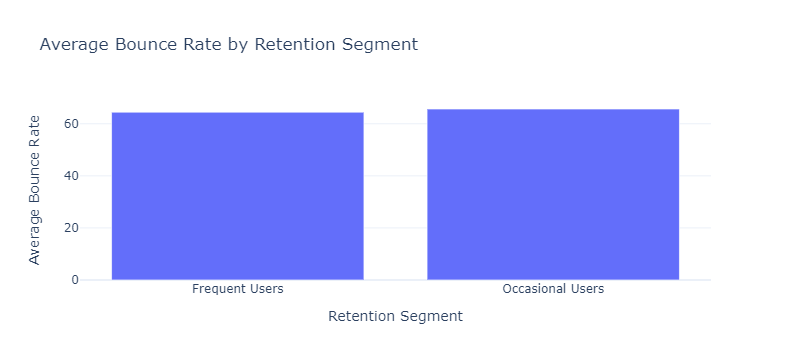

In [50]:
# Calculate the average bounce rate for each retention segment
segment_bounce_rates = df.groupby('Retention Segment')['Bounce Rate'].mean().reset_index()

# Create a bar chart to visualize the average bounce rates by retention segment
bar_fig = px.bar(segment_bounce_rates, x='Retention Segment', y='Bounce Rate',
                 title='Average Bounce Rate by Retention Segment',
                 labels={'Retention Segment': 'Retention Segment', 'Bounce Rate': 'Average Bounce Rate'})

bar_fig.show()

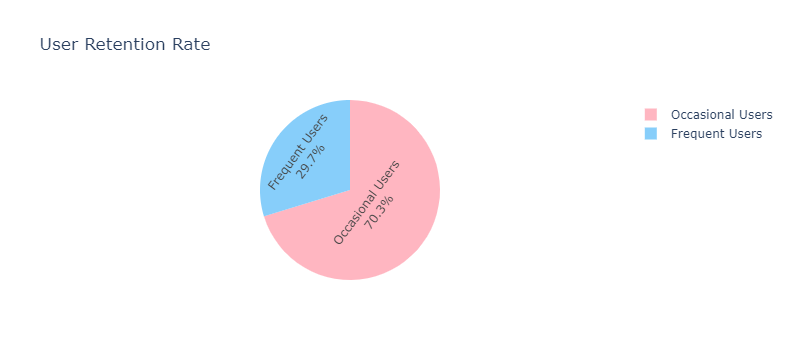

In [53]:
# Count the number of users in each retention segment
segment_counts = df['Retention Segment'].value_counts()

# Define the pastel colors
colors = ['#FFB6C1', '#87CEFA']

# Create a pie chart using Plotly
fig = px.pie(segment_counts, 
             values=segment_counts.values, 
             names=segment_counts.index, 
             color=segment_counts.index, 
             color_discrete_sequence=colors,
             title='User Retention Rate')

# Update layout and show the chart
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True)
fig.show()

In the data of 1000 users, the platform retained 29.7% of users (297 users) who frequently visit the platform. This retention rate is not bad at all. 